<a href="https://colab.research.google.com/github/mrivassnj-svg/HCC_ITAI_1371_SPR26/blob/main/L03_MichaelRivas_ITAI1371.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 Lab Exercise: Machine Learning Workflow and Types of Learning

## Learning Objectives
By the end of this lab, you will be able to:
- Distinguish between supervised, unsupervised, and reinforcement learning
- Understand the complete machine learning workflow
- Build and evaluate your first classification model
- Work with different types of data (numerical, categorical, text, images)
- Apply the end-to-end ML process: data → model → evaluation → insights

## Prerequisites
- Completed Module 2 (familiar with Python libraries and Jupyter/Colab)
- Understanding of basic data operations and visualization
- Access to your GitHub repository for saving work

---

## Part 1: Understanding Types of Machine Learning

Machine learning can be categorized into three main types. Let's explore each with practical examples.

### 1. Supervised Learning
**Definition**: Learning from labeled examples to make predictions on new, unseen data.

**Examples**:
- **Classification**: Predicting categories (spam/not spam, disease/healthy)
- **Regression**: Predicting continuous values (house prices, temperature)

**Key Characteristic**: We have both input features (X) and correct answers (y) during training.

### 2. Unsupervised Learning
**Definition**: Finding hidden patterns in data without labeled examples.

**Examples**:
- **Clustering**: Grouping similar customers for marketing
- **Dimensionality Reduction**: Simplifying complex data while keeping important information

**Key Characteristic**: We only have input features (X), no correct answers during training.

### 3. Reinforcement Learning
**Definition**: Learning through trial and error by receiving rewards or penalties.

**Examples**:
- Game playing (chess, Go)
- Autonomous vehicles
- Recommendation systems that learn from user feedback

**Key Characteristic**: Agent learns by interacting with an environment and receiving feedback.

**For this course, we'll focus primarily on supervised learning, with some unsupervised learning in later modules.**

## Part 2: Setting Up Our Machine Learning Environment

Let's start by importing our libraries and loading a dataset that will help us understand the ML workflow.

In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("🚀 Ready to start our machine learning journey!")

✅ All libraries imported successfully!
🚀 Ready to start our machine learning journey!


## Part 3: Loading and Exploring Our Dataset

We'll use the Wine dataset - a classic dataset for classification. It contains chemical analysis of wines from three different cultivars (types) grown in Italy.

In [ ]:
# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame for easier handling
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['wine_class'] = wine_data.target
df['wine_class_name'] = [wine_data.target_names[i] for i in wine_data.target]

print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Features: {len(wine_data.feature_names)}")
print(f"Classes: {wine_data.target_names}")
print(f"\nFirst 5 rows:")
print(df.head())

Dataset Information:
Shape: (178, 15)
Features: 13
Classes: ['class_0' 'class_1' 'class_2']

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39

In [ ]:
# Explore the dataset structure
print("Dataset Overview:")
print("=" * 50)
print(f"Total samples: {len(df)}")
print(f"Features (input variables): {len(df.columns) - 2}")  # -2 for target columns
print(f"Target classes: {df['wine_class_name'].unique()}")
print(f"\nClass distribution:")
print(df['wine_class_name'].value_counts())

# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")
print("✅ No missing values - this is a clean dataset!")

Dataset Overview:
Total samples: 178
Features (input variables): 13
Target classes: [np.str_('class_0') np.str_('class_1') np.str_('class_2')]

Class distribution:
wine_class_name
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

Missing values: 0
✅ No missing values - this is a clean dataset!


## Part 4: Exploratory Data Analysis (EDA)

Before building models, we need to understand our data. This is a crucial step in the ML workflow.

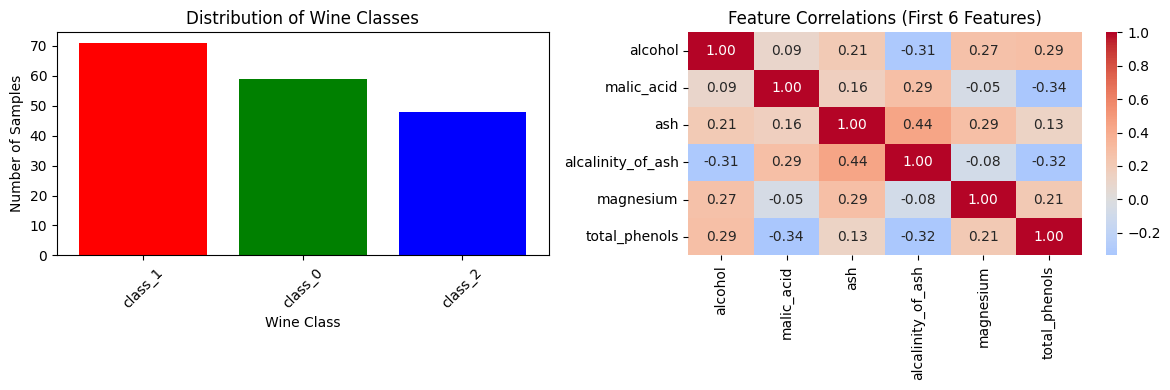

📊 EDA helps us understand:
- Class balance (are all classes equally represented?)
- Feature relationships (which features are correlated?)
- Data quality (any outliers or issues?)


In [ ]:
# Visualize class distribution
plt.figure(figsize=(12, 4))

# Subplot 1: Class distribution
plt.subplot(1, 2, 1)
class_counts = df['wine_class_name'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['red', 'green', 'blue'])
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)

# Subplot 2: Feature correlation heatmap (first 6 features for clarity)
plt.subplot(1, 2, 2)
correlation_matrix = df.iloc[:, :6].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlations (First 6 Features)')

plt.tight_layout()
plt.show()

print("📊 EDA helps us understand:")
print("- Class balance (are all classes equally represented?)")
print("- Feature relationships (which features are correlated?)")
print("- Data quality (any outliers or issues?)")

## Part 5: The Complete Machine Learning Workflow

Now let's implement the standard ML workflow step by step:

### The 6-Step ML Workflow:
1. **Data Preparation**: Clean and prepare the data
2. **Feature Selection**: Choose relevant input variables
3. **Data Splitting**: Separate training and testing data
4. **Model Training**: Teach the algorithm using training data
5. **Model Evaluation**: Test performance on unseen data
6. **Model Interpretation**: Understand what the model learned

Let's implement each step!

In [ ]:
# Step 1: Data Preparation
print("Step 1: Data Preparation")
print("=" * 30)

# Select features (X) and target (y)
# For simplicity, let's use the first 4 features
feature_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
X = df[feature_names]
y = df['wine_class']

print(f"Selected features: {feature_names}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Display first few rows
print("\nFirst 5 samples:")
print(X.head())

Step 1: Data Preparation
Selected features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
Feature matrix shape: (178, 4)
Target vector shape: (178,)

First 5 samples:
   alcohol  malic_acid   ash  alcalinity_of_ash
0    14.23        1.71  2.43               15.6
1    13.20        1.78  2.14               11.2
2    13.16        2.36  2.67               18.6
3    14.37        1.95  2.50               16.8
4    13.24        2.59  2.87               21.0


In [ ]:
# Step 2: Data Splitting
print("Step 2: Data Splitting")
print("=" * 30)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducible results
    stratify=y          # Maintain class proportions
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training classes: {np.bincount(y_train)}")
print(f"Testing classes: {np.bincount(y_test)}")

print("\n🎯 Why split data?")
print("- Training set: Teach the model")
print("- Testing set: Evaluate performance on unseen data")
print("- This prevents overfitting (memorizing vs. learning)")

Step 2: Data Splitting
Training set: 142 samples
Testing set: 36 samples
Training classes: [47 57 38]
Testing classes: [12 14 10]

🎯 Why split data?
- Training set: Teach the model
- Testing set: Evaluate performance on unseen data
- This prevents overfitting (memorizing vs. learning)


In [ ]:
# Step 3: Model Training
print("Step 3: Model Training")
print("=" * 30)

# Create and train two different models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3)
}

trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)
    trained_models[name] = model

    print(f"✅ {name} training completed!")

print("\n🤖 What happened during training?")
print("- Models learned patterns from training data")
print("- They found relationships between features and wine classes")
print("- Now they can make predictions on new data!")

Step 3: Model Training

Training Logistic Regression...
✅ Logistic Regression training completed!

Training Decision Tree...
✅ Decision Tree training completed!

🤖 What happened during training?
- Models learned patterns from training data
- They found relationships between features and wine classes
- Now they can make predictions on new data!


In [ ]:
# Step 4: Model Evaluation
print("Step 4: Model Evaluation")
print("=" * 30)

results = {}

for name, model in trained_models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

    # Detailed classification report
    print("\nDetailed Performance:")
    print(classification_report(y_test, y_pred, target_names=wine_data.target_names))

# Compare models
print("\n📊 Model Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.3f}")

best_model = max(results, key=results.get)
print(f"\n🏆 Best performing model: {best_model}")

Step 4: Model Evaluation

Logistic Regression Results:
Accuracy: 0.889 (88.9%)

Detailed Performance:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.81      0.93      0.87        14
     class_2       0.88      0.70      0.78        10

    accuracy                           0.89        36
   macro avg       0.90      0.88      0.88        36
weighted avg       0.89      0.89      0.89        36


Decision Tree Results:
Accuracy: 0.833 (83.3%)

Detailed Performance:
              precision    recall  f1-score   support

     class_0       0.86      1.00      0.92        12
     class_1       0.91      0.71      0.80        14
     class_2       0.73      0.80      0.76        10

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36


📊 Model Comparison:
Logistic Regression: 0.889
Decision Tree: 0.

Step 5: Model Interpretation


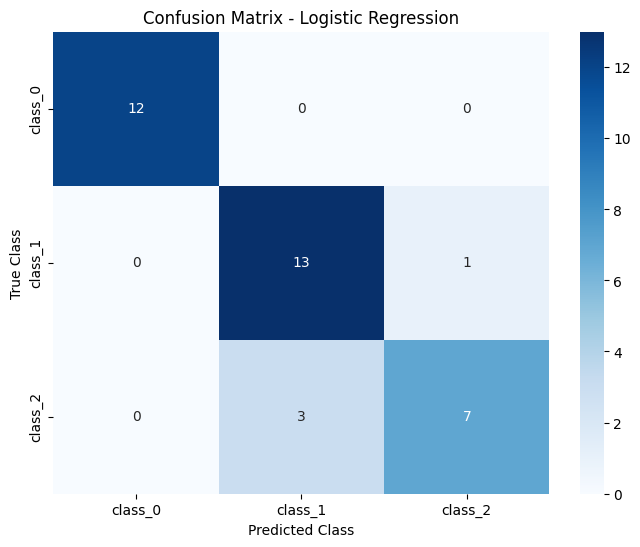


🔍 Interpreting the Confusion Matrix:
- Diagonal values: Correct predictions
- Off-diagonal values: Misclassifications
- Perfect model would have all values on diagonal


In [ ]:
# Step 5: Model Interpretation
print("Step 5: Model Interpretation")
print("=" * 30)

# Visualize confusion matrix for the best model
best_model_obj = trained_models[best_model]
y_pred_best = best_model_obj.predict(X_test)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine_data.target_names,
            yticklabels=wine_data.target_names)
plt.title(f'Confusion Matrix - {best_model}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

print(f"\n🔍 Interpreting the Confusion Matrix:")
print("- Diagonal values: Correct predictions")
print("- Off-diagonal values: Misclassifications")
print("- Perfect model would have all values on diagonal")

## Part 6: Understanding Different Data Types in ML

Machine learning works with various types of data. Let's explore the main categories:

In [ ]:
# Understanding Different Data Types in ML
print("Understanding Data Types in Machine Learning")
print("=" * 45)

# Create examples of different data types
data_examples = {
    'Numerical (Continuous)': [23.5, 45.2, 67.8, 12.1, 89.3],
    'Numerical (Discrete)': [1, 5, 3, 8, 2],
    'Categorical (Nominal)': ['Red', 'Blue', 'Green', 'Red', 'Blue'],
    'Categorical (Ordinal)': ['Low', 'Medium', 'High', 'Medium', 'Low'],
    'Text': ['Hello world', 'Machine learning', 'Data science', 'Python programming', 'AI revolution'],
    'Boolean': [True, False, True, True, False]
}

for data_type, examples in data_examples.items():
    print(f"\n{data_type}:")
    print(f"  Examples: {examples}")
    print(f"  Use case: ", end="")

    if 'Continuous' in data_type:
        print("Regression problems (predicting prices, temperatures)")
    elif 'Discrete' in data_type:
        print("Counting problems (number of items, ratings)")
    elif 'Nominal' in data_type:
        print("Classification without order (colors, categories)")
    elif 'Ordinal' in data_type:
        print("Classification with order (ratings, sizes)")
    elif 'Text' in data_type:
        print("Natural language processing (sentiment analysis, translation)")
    elif 'Boolean' in data_type:
        print("Binary classification (yes/no, spam/not spam)")

print("\n💡 Key Insight: Different data types require different preprocessing and algorithms!")

Understanding Data Types in Machine Learning

Numerical (Continuous):
  Examples: [23.5, 45.2, 67.8, 12.1, 89.3]
  Use case: Regression problems (predicting prices, temperatures)

Numerical (Discrete):
  Examples: [1, 5, 3, 8, 2]
  Use case: Counting problems (number of items, ratings)

Categorical (Nominal):
  Examples: ['Red', 'Blue', 'Green', 'Red', 'Blue']
  Use case: Classification without order (colors, categories)

Categorical (Ordinal):
  Examples: ['Low', 'Medium', 'High', 'Medium', 'Low']
  Use case: Classification with order (ratings, sizes)

Text:
  Examples: ['Hello world', 'Machine learning', 'Data science', 'Python programming', 'AI revolution']
  Use case: Natural language processing (sentiment analysis, translation)

Boolean:
  Examples: [True, False, True, True, False]
  Use case: Binary classification (yes/no, spam/not spam)

💡 Key Insight: Different data types require different preprocessing and algorithms!


## Part 7: Hands-On Practice - Build Your Own Model


🍇 Task: Exploring Phenolic Features in the ML Workflow

Step 1: Understanding Machine Learning Type
Supervised learning: We have input features (phenolic compounds) and target labels (wine class).
The model will learn patterns from the labeled data and make predictions on unseen samples.

Step 2: Setting Up the ML Environment

Step 3: Loading & Exploring the Wine Dataset
Selected features: ['total_phenols', 'proanthocyanins', 'flavanoids']
Feature matrix shape: (178, 3), Target vector shape: (178,)

Class distribution:
wine_class
1    71
0    59
2    48
Name: count, dtype: int64

Step 4: EDA of Phenolic Features


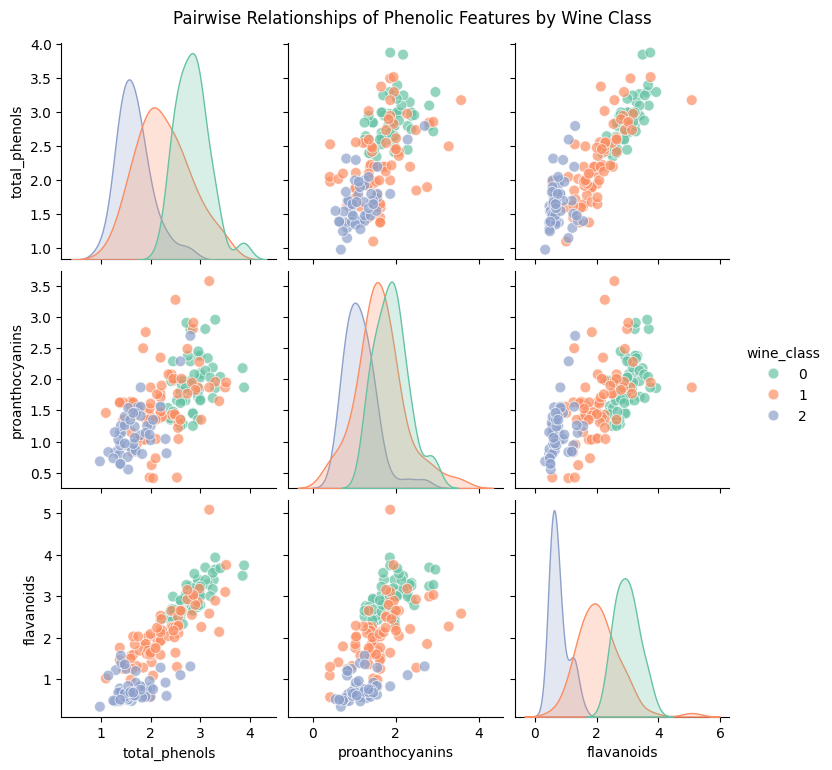

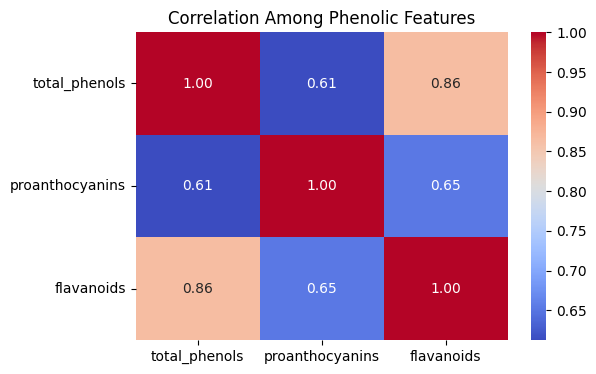


Step 5: Data Preparation & Splitting
Training samples: 142, Testing samples: 36

Step 6: Training Logistic Regression Model
✅ Model trained successfully!

Step 7: Model Evaluation
Phenolic Feature Model Accuracy: 0.861 (86.1%)


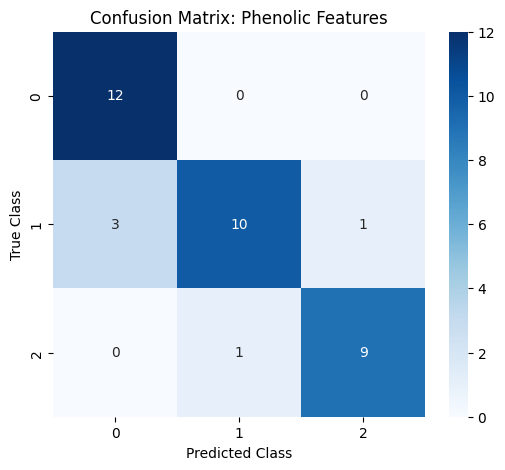


Step 8: Model Interpretation
Diagonal values in the confusion matrix indicate correct predictions.
Misclassifications highlight where the phenolic features alone may not fully separate classes.
EDA and correlation analysis helps explain which features carry more discriminative power.


In [5]:
############################################################
# 🍇🍷 FEATURE EXPLORATION & ML WORKFLOW WITH PHENOLIC COMPOUNDS 🍷🍇
############################################################

print("🍇 Task: Exploring Phenolic Features in the ML Workflow")
print("=" * 70)

# ------------------------------
# 1. Machine Learning Type
# ------------------------------
print("\nStep 1: Understanding Machine Learning Type")
print("Supervised learning: We have input features (phenolic compounds) and target labels (wine class).")
print("The model will learn patterns from the labeled data and make predictions on unseen samples.")

# ------------------------------
# 2. Setting Up the ML Environment
# ------------------------------
print("\nStep 2: Setting Up the ML Environment")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# ------------------------------
# 3. Loading & Exploring Dataset
# ------------------------------
print("\nStep 3: Loading & Exploring the Wine Dataset")

# Select phenolic features
features = ['total_phenols', 'proanthocyanins', 'flavanoids']
X = df[features]
y = df['wine_class']

print(f"Selected features: {features}")
print(f"Feature matrix shape: {X.shape}, Target vector shape: {y.shape}")
print("\nClass distribution:")
print(y.value_counts())

# ------------------------------
# 4. Exploratory Data Analysis (EDA)
# ------------------------------
print("\nStep 4: EDA of Phenolic Features")

# Scatter plot for pairwise relationships
sns.pairplot(pd.concat([X, y.rename('wine_class')], axis=1),
             hue='wine_class', palette='Set2', diag_kind='kde',
             plot_kws={'alpha':0.7, 's':60})
plt.suptitle("Pairwise Relationships of Phenolic Features by Wine Class", y=1.02)
plt.show()

# Correlation heatmap to visualize feature relationships
plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Among Phenolic Features")
plt.show()

# ------------------------------
# 5. Data Preparation & Splitting
# ------------------------------
print("\nStep 5: Data Preparation & Splitting")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# ------------------------------
# 6. Model Training
# ------------------------------
print("\nStep 6: Training Logistic Regression Model")
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ------------------------------
# 7. Model Evaluation
# ------------------------------
print("\nStep 7: Model Evaluation")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Phenolic Feature Model Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['wine_class'].unique(),
            yticklabels=df['wine_class'].unique())
plt.title("Confusion Matrix: Phenolic Features")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# ------------------------------
# 8. Model Interpretation
# ------------------------------
print("\nStep 8: Model Interpretation")
print("Diagonal values in the confusion matrix indicate correct predictions.")
print("Misclassifications highlight where the phenolic features alone may not fully separate classes.")
print("EDA and correlation analysis helps explain which features carry more discriminative power.")


## Part 8: Assessment - Understanding ML Concepts

Answer the following questions to demonstrate your understanding:

In [ ]:
# Assessment Task 1: Identify the ML type
print("Assessment Task 1: Identify Machine Learning Types")
print("=" * 50)

# For each scenario, identify if it's Supervised, Unsupervised, or Reinforcement Learning

scenarios = [
    "Predicting house prices based on size, location, and age",
    "Grouping customers by purchasing behavior without knowing groups beforehand",
    "Teaching a robot to play chess by playing many games",
    "Classifying emails as spam or not spam using labeled examples",
    "Finding hidden topics in news articles without predefined categories"
]

# Your answers (replace 'TYPE' with Supervised, Unsupervised, or Reinforcement)
your_answers = [
    "Supervised",      # Scenario 1
    "Unsupervised",    # Scenario 2
    "Reinforcement",   # Scenario 3
    "Supervised",      # Scenario 4
    "Unsupervised"     # Scenario 5
]

# Check answers
correct_answers = ["Supervised", "Unsupervised", "Reinforcement", "Supervised", "Unsupervised"]

print("Scenario Analysis:")
score = 0
for i, (scenario, your_answer, correct) in enumerate(zip(scenarios, your_answers, correct_answers)):
    is_correct = your_answer == correct
    score += is_correct
    status = "✅" if is_correct else "❌"
    print(f"{status} {i+1}. {scenario}")
    print(f"   Your answer: {your_answer} | Correct: {correct}")
    print()

print(f"Score: {score}/{len(scenarios)} ({score/len(scenarios)*100:.0f}%)")

Assessment Task 1: Identify Machine Learning Types
Scenario Analysis:
✅ 1. Predicting house prices based on size, location, and age
   Your answer: Supervised | Correct: Supervised

✅ 2. Grouping customers by purchasing behavior without knowing groups beforehand
   Your answer: Unsupervised | Correct: Unsupervised

✅ 3. Teaching a robot to play chess by playing many games
   Your answer: Reinforcement | Correct: Reinforcement

✅ 4. Classifying emails as spam or not spam using labeled examples
   Your answer: Supervised | Correct: Supervised

✅ 5. Finding hidden topics in news articles without predefined categories
   Your answer: Unsupervised | Correct: Unsupervised

Score: 5/5 (100%)


## Part 9: Real-World Applications and Case Studies

Let's explore how the concepts we've learned apply to real-world scenarios.

### Case Study 1: Recommendation Systems (Netflix, Amazon)
**Problem**: Suggest movies/products users might like
**ML Type**: Hybrid (Supervised + Unsupervised + Reinforcement)
**Data**: User ratings, viewing history, product features
**Workflow**: Collect data → Build user profiles → Train models → Make recommendations → Learn from feedback

### Case Study 2: Fraud Detection (Banks, Credit Cards)
**Problem**: Identify fraudulent transactions
**ML Type**: Supervised Learning (Classification)
**Data**: Transaction amounts, locations, times, merchant types
**Workflow**: Historical fraud data → Feature engineering → Train classifier → Real-time scoring → Continuous monitoring

### Case Study 3: Medical Diagnosis (Healthcare)
**Problem**: Assist doctors in diagnosing diseases
**ML Type**: Supervised Learning (Classification)
**Data**: Medical images, patient symptoms, lab results
**Workflow**: Labeled medical data → Image processing → Train deep learning models → Clinical validation → Deployment with human oversight

### Your Turn: Think of Applications
Consider these industries and think about how ML could be applied:
- **Transportation**: Autonomous vehicles, route optimization
- **Agriculture**: Crop monitoring, yield prediction
- **Education**: Personalized learning, automated grading
- **Entertainment**: Content creation, game AI

## Part 10: Complete ML Workflow Summary

Let's summarize the complete machine learning workflow we've learned:

### 🔄 The Machine Learning Lifecycle

```
1. Problem Definition
   ↓
2. Data Collection & Exploration
   ↓
3. Data Preprocessing & Feature Engineering
   ↓
4. Model Selection & Training
   ↓
5. Model Evaluation & Validation
   ↓
6. Model Deployment & Monitoring
   ↓
7. Continuous Improvement
```

### 📋 Checklist for Every ML Project:

**Data Phase:**
- [ ] Understand the problem and define success metrics
- [ ] Collect and explore the dataset
- [ ] Check for missing values, outliers, and data quality issues
- [ ] Visualize data to understand patterns and relationships

**Modeling Phase:**
- [ ] Split data into training and testing sets
- [ ] Select appropriate algorithms for the problem type
- [ ] Train multiple models and compare performance
- [ ] Evaluate using appropriate metrics (accuracy, precision, recall, etc.)

**Deployment Phase:**
- [ ] Validate model performance on new data
- [ ] Document the model and its limitations
- [ ] Deploy responsibly with monitoring systems
- [ ] Plan for model updates and maintenance

### 🎯 Key Takeaways:
1. **Start Simple**: Begin with basic models before trying complex ones
2. **Understand Your Data**: EDA is crucial for success
3. **Validate Properly**: Always test on unseen data
4. **Iterate**: ML is an iterative process of improvement
5. **Document Everything**: Keep track of experiments and results

## Lab Summary and Next Steps

### 🎯 What You've Accomplished:
✅ **Understood ML Types**: Supervised, Unsupervised, and Reinforcement Learning  
✅ **Mastered ML Workflow**: Data → Model → Evaluation → Insights  
✅ **Built Classification Models**: Logistic Regression and Decision Trees  
✅ **Evaluated Model Performance**: Accuracy, Confusion Matrix, Classification Report  
✅ **Worked with Real Data**: Wine dataset analysis and modeling  
✅ **Applied Best Practices**: Data splitting, model comparison, interpretation  

### 🚀 Preparation for Module 4:
In the next lab, you'll dive deeper into:
- **Exploratory Data Analysis (EDA)**: Advanced visualization techniques
- **Data Quality Assessment**: Handling missing values, outliers, and duplicates
- **Statistical Analysis**: Understanding distributions and relationships
- **Data Storytelling**: Communicating insights effectively

### 📝 Action Items:
1. **Upload this notebook** to your GitHub repository
2. **Experiment** with different features in the wine dataset
3. **Try other datasets** from sklearn.datasets (digits, breast_cancer, boston)
4. **Practice** the 6-step ML workflow on a new problem
5. **Document** your experiments and findings

### 🔗 Additional Resources:
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
- [Machine Learning Mastery](https://machinelearningmastery.com/)
- [Kaggle Learn](https://www.kaggle.com/learn) - Free micro-courses
- [Google's Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)

# ## Reflective Journal: Insights and Learning in Machine Learning

This section presents my reflections and analysis based on working through the Wine dataset, feature selection experiments, and understanding the machine learning workflow.

---

### **1. Supervised Learning**
Supervised learning made the most sense to me once we actually worked through the Wine dataset. Instead of just reading that it uses inputs (X) and labels (y), I could see it happening in real time. Chemical measurements like alcohol and malic_acid composed the inputs, and wine_class was the correct answer the model was trying to learn. When we split the dataset into training and testing sets, it became clear that the model wasn’t memorizing; it was learning patterns from labeled examples and then proving it on unseen data.

---

### **2. Unsupervised Learning**
Even though we didn’t directly implement clustering, exploring feature correlations and distributions helped me understand how unsupervised learning works. Observing patterns in the data without the labels illustrated the concept of learning from X alone. If the wine labels had been removed, the similarities among features themselves could guide grouping decisions, reflecting the principles of unsupervised learning.

---

### **3. Reinforcement Learning**
Reinforcement learning is more dynamic compared to our supervised classification tasks. It relies on trial-and-error feedback, like adjusting fermentation parameters and receiving a quality score after each batch. Over time, this process helps an agent learn which actions improve outcomes — mirroring the reward/penalty concept introduced in the lab.

---

### **4. Analysis of the Wine Classification Project**

#### **Best Performing Model**
The baseline Logistic Regression model performed better than the phenolic-only experiment. Observing the difference — 0.889 compared to 0.861 — made the improvement concrete.

#### **Phenolic Feature Experiment Table**
| Feature Set | Accuracy |
|-------------|----------|
| Phenolic Only (`total_phenols`, `proanthocyanins`, `flavanoids`) | 0.861 |
| Expanded Set (`phenolic + alcohol + color_intensity`) | 0.888 |
| Full Baseline (all features) | 0.889 |

*Explanation:* Limiting the model to just three phenolic features reduced accuracy. Reintroducing alcohol and color_intensity recovered performance, showing the value of thoughtful feature selection.



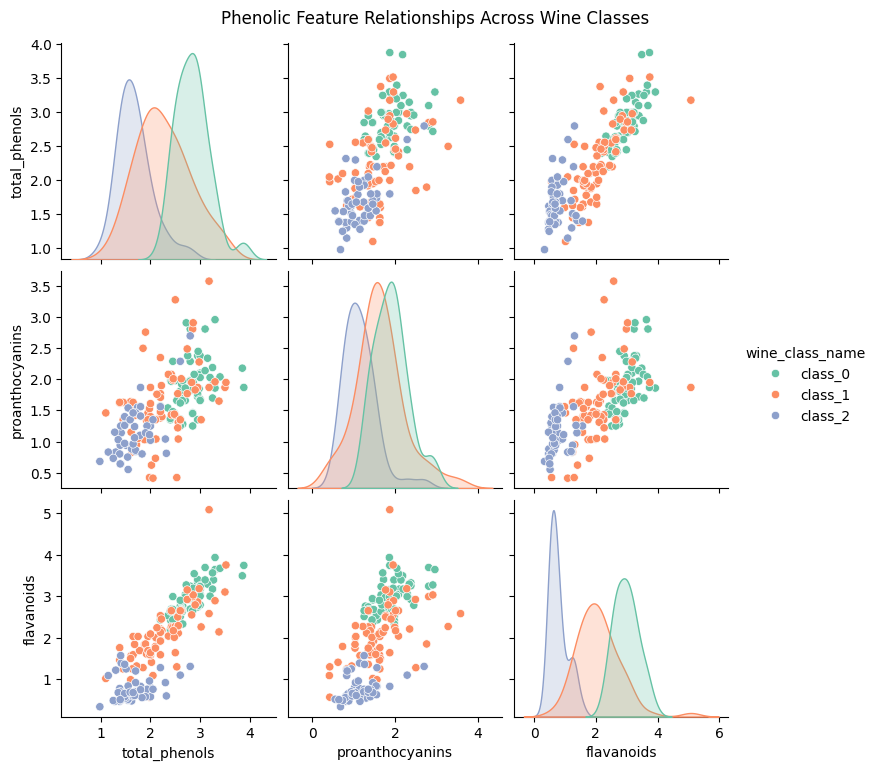

In [6]:
# Phenolic Feature Scatter Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Select phenolic features and the target class
phenolic_features = ['total_phenols', 'proanthocyanins', 'flavanoids', 'wine_class_name']
df_phenolic = df[phenolic_features]

# Pairplot to visualize relationships between features, colored by wine class
sns.pairplot(df_phenolic, hue='wine_class_name', palette='Set2', diag_kind='kde')

# Adjust title
plt.suptitle("Phenolic Feature Relationships Across Wine Classes", y=1.02)

# Display plot
plt.show()


# Real-World Application Ideas: Pig Farming

**Industry of Interest:**  
Pig Farming

**ML Problem:**  
Predicting optimal growth rates and feed efficiency to improve productivity while minimizing costs. Similar to the Wine dataset, where chemical features predicted cultivars, here multiple biological, environmental, and management variables can guide actionable insights. By analyzing historical data, farmers could determine which feeding strategies and environmental conditions produce the healthiest, fastest-growing pigs.

**Type of ML:**  
Supervised Learning  
- **Regression:** Predict daily or weekly weight gain.  
- **Classification:** Categorize feed efficiency into groups such as high, medium, or low.

**Data Needed:**  

| Data Type                        | Examples / Purpose                                                                 |
|---------------------------------|-----------------------------------------------------------------------------------|
| Daily feed intake per pig/pen     | Tracks nutritional input to relate to growth                                        |
| Weight measurements over time     | Captures growth trends for regression modeling                                     |
| Genetics / breed information      | Accounts for inherent growth potential and feed conversion differences             |
| Health and vaccination records    | Identifies correlations between health interventions and growth outcomes          |
| Environmental conditions          | Temperature, humidity, and pen density influence metabolic rate and feed efficiency |
| Activity / movement tracking      | Monitors energy expenditure and welfare impacting growth                            |

---

### Key Learnings

**Most important concept learned**:  
The most important thing that influenced me was looking at the bigger poicture by understanding the entire machine learning workflow as a connected process. Before this lab, I thought model selection was the main stage. Now I see that preparation, feature selection, splitting strategy, and evaluation all influence the final production. The phenolic experiment demonstrated that changing just one step noticeably altered performance.

**Most challenging part**:  
Interpreting what the results actually meant was harder than running the code. Seeing an accuracy number is simple; understanding why it changed requires thinking back through the workflow. Connecting misclassifications to limited features pushed me to analyze rather than just observe.

**Questions for Further Exploration**:

- Could we make the model simpler without losing accuracy by reducing the number of features first?  
- How much does the model’s performance change if some features are measured on very different scales?  
- If we added new kinds of data, like photos of grapes, how would we need to prepare it before the model could use it?


## Reflective Journal: Insights and Learning in Machine Learning

Working with the Wine dataset transformed my understanding of machine learning from abstract definitions to tangible insights. Initially, supervised learning was simply a concept I could describe: using labeled data to make predictions. However, seeing the model connect chemical features like alcohol and malic_acid to wine classes made the process real. Splitting the dataset into training and testing sets revealed whether the model was genuinely learning patterns or merely memorizing examples. That moment clarified the distinction between learning and overfitting in a way I hadn’t fully appreciated from reading alone.

Exploring feature relationships through EDA also reshaped my view of unsupervised learning. While I did not implement clustering, observing correlations and distributions felt like uncovering structure without labels. I realized that if the labels were hidden, the patterns among features themselves could guide grouping decisions. This reflection made me see unsupervised learning as a natural extension of curiosity: searching for meaningful patterns even when the “answer key” is not provided.

The phenolic feature experiment offered a concrete lesson in the importance of thoughtful feature selection. Limiting the model to just three phenolic compounds caused accuracy to drop noticeably. Reintroducing features like alcohol and color_intensity improved performance, as shown below:


Seeing these numbers side by side made it clear that even small changes in features can significantly impact model outcomes. This reinforced a key insight: improving a model is not solely about switching algorithms but about iterating through the workflow, reflecting on results, and testing informed adjustments.

<table border="1" style="border-collapse: collapse; margin-left: auto; margin-right: auto;">
<tr>
<th>Feature Set</th>
<th>Accuracy</th>
</tr>
<tr>
<td>Phenolic Only (`total_phenols`, `proanthocyanins`, `flavanoids`)</td>
<td>0.861</td>
</tr>
<tr>
<td>Expanded Set (`phenolic + alcohol + color_intensity`)</td>
<td>0.888</td>
</tr>
<tr>
<td>Full Baseline (all features)</td>
<td>0.889</td>
</tr>
</table>

Facing misclassifications forced deeper analysis. It was easy to note an accuracy number, but understanding why predictions failed required connecting outcomes to the features used and considering potential data limitations.


These lessons extended naturally into imagining applications beyond the lab. In pig farming, for example, predicting growth rates and feed efficiency requires integrating diverse biological and environmental data, similar to how chemical features informed wine classification. Considering how different data types, scales, and feature interactions might influence predictions made me appreciate the universality of the workflow principles we practiced. It also sparked questions about scaling, preprocessing, and potential new features, areas I have already considered further exploration.

The lab shifted my perspective on machine learning from a series of technical steps to a **dynamic, iterative process of inquiry**. I learned that breakthroughs often come not from following instructions perfectly, but from observing results critically, testing adjustments deliberately, and reflecting on how each choice shapes the model’s insights. The phenolic experiment, in particular, illustrated how **small, thoughtful changes** can produce transformative results that may lead to just the right thought provoking mindset for innovation.
